# <center> Tarea 6, Diplomado en Inteligencia Artificial y Aprendizaje Profundo
    
    
* Juan Felipe Alayón Martiínez 
* jalayonm@unal.edu.co
* Mayo  2023

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Reescriba el algoritmo de la clase de modelaje Estadístico siguiendo las siguientes instrucciones. No olvide tener al lado a Open Assitant o Chat GPT

## Punto 1

Escriba una clase iterable que cree los datos y los entregue en lotes de tamaño k (por defecto 32). cada vez que se le soliciten los datos, debe entregar un lote de datos de forma aleatoria.

## Punto 2

Escriba la clase Trainer. Esta clase recibe la función de perdida, la función predictora y una instancia de la clase generadora de datos. La clase debe incluir método de paso de entrenamiento, método ajuste (fit), método de entrega de parámetros, método de evaluación del modelo, método de predicción y un método gráfico que dibuje las funciones de pérdida y de precisión (accuracy).


# SOLUCIÓN

In [7]:
def pred(x,w,b):
    y_hat = 1 / (1 + tf.exp(-tf.add(tf.matmul(x,w),b)))
    return y_hat

# pérdida
def loss_f(y,y_pred):
    loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))
    return loss

class RandomDataGenerator:
    def __init__(self, n):
        self.n = n
        self.x = None
        self.y = None

    def generate_data(self):
        np.random.seed()
        x = np.random.randn(self.n, 2)
        y = np.random.randint(0, 2, (self.n, 1))
        class_0 = x[y.ravel() == 0]
        class_1 = x[y.ravel() == 1]
        class_1 += 2.5
        x[y.ravel() == 1] += 2.5

        self.x = tf.cast(x, dtype=tf.float32)
        self.y = tf.cast(y, dtype=tf.float32)
        return self.x,self.y

    def get_batch(self, batch_size=32):
        indices = np.random.choice(self.n, batch_size, replace=False)
        batch_x = tf.gather(self.x, indices)
        batch_y = tf.gather(self.y, indices)
        return batch_x, batch_y


class Trainer:
    def __init__(self, loss_fn, prediction_fn, data_generator):
        self.loss_fn = loss_fn
        self.prediction_fn = prediction_fn
        self.data_generator = data_generator
        self.w = None
        self.b = None
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

    def train_step(self, x, y):
        with tf.GradientTape() as tape:
            y_pred = self.prediction_fn(x, self.w, self.b)
            loss = self.loss_fn(y, y_pred)
        gradients = tape.gradient(loss, [self.w, self.b])
        self.optimizer.apply_gradients(zip(gradients, [self.w, self.b]))
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(y_pred), y), tf.float32))
        return loss, accuracy

    def fit(self, epochs=10, batch_size=32):
        self.w = tf.Variable([[-2.0], [2.0]], dtype=tf.float32)
        self.b = tf.Variable([0.], dtype=tf.float32)
        self.data_generator.generate_data()
        losses = []
        accuracies = []
        for epoch in range(epochs):
            avg_loss = 0.
            avg_accuracy = 0.
            total_batch = int(self.data_generator.n / batch_size)
            for _ in range(total_batch):
                batch_x, batch_y = self.data_generator.get_batch(batch_size)
                loss, accuracy = self.train_step(batch_x, batch_y)
                avg_loss += loss / total_batch
                avg_accuracy += accuracy / total_batch
                losses.append(avg_loss)
                accuracies.append(avg_accuracy)
            print("Epoch:", epoch, "loss:", avg_loss.numpy(), "accuracy:", avg_accuracy.numpy())
        return losses, accuracies

    def get_parameters(self):
        return self.w, self.b

    def evaluate_model(self):
        y_pred = self.prediction_fn(self.data_generator.x, self.w, self.b)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(y_pred), self.data_generator.y), tf.float32))
        return accuracy.numpy()

    def predict(self, x):
        return self.prediction_fn(x, self.w, self.b)

    def plot_loss_accuracy(self, losses, accuracies):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(losses)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')

In [10]:
# Cada llamado da un conjunto de datos distintos

np.random.seed()
n=10

data_gen = RandomDataGenerator(n)

data= data_gen.generate_data()
print(data)
data= data_gen.generate_data()
print(data)

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.7524738 ,  0.26830566],
       [ 1.9599117 ,  2.9003716 ],
       [-0.33007962,  0.03385202],
       [-0.8295925 ,  1.2127454 ],
       [ 0.91222686,  2.7436528 ],
       [-0.96930563, -0.7155315 ],
       [ 0.5090303 , -1.0626842 ],
       [ 3.671047  ,  2.8612735 ],
       [ 3.2816637 ,  2.2204163 ],
       [-0.6497445 ,  1.8481679 ]], dtype=float32)>, <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)>)
(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1.4227295 ,  1.2107244 ],
       [-0.28311282,  1.0115201 ],
       [ 0.46889973,  0.47512063],
       [ 1.4795113 ,  1.1036696 ],
       [ 1.2444375 ,  2.1064525 ],
       [ 1.666941  ,  0.92551243],
       [ 4.3186083 ,  2.5953448 ],
       [ 0.18828662,  1.2576181 ],
       [-0.71613604, -2.3343143 ],
       [ 1.5101979 ,

In [20]:
np.random.seed()

data_generator = RandomDataGenerator(n=500)
trainer = Trainer(loss_fn=loss_f, prediction_fn=pred, data_generator=data_generator)

losses, accuracies = trainer.fit(epochs=10, batch_size=32)
parameters = trainer.get_parameters()
accuracy = trainer.evaluate_model()

Epoch: 0 loss: 0.6872806 accuracy: 0.71875
Epoch: 1 loss: 0.32437047 accuracy: 0.85416657
Epoch: 2 loss: 0.18454058 accuracy: 0.9270833
Epoch: 3 loss: 0.15795368 accuracy: 0.92916656
Epoch: 4 loss: 0.107539825 accuracy: 0.9666666
Epoch: 5 loss: 0.101043455 accuracy: 0.95624983
Epoch: 6 loss: 0.10214274 accuracy: 0.96249986
Epoch: 7 loss: 0.107526176 accuracy: 0.96874994
Epoch: 8 loss: 0.080747455 accuracy: 0.9729167
Epoch: 9 loss: 0.089021005 accuracy: 0.96666664


In [21]:
print("Final parameters:", parameters)
print("Final accuracy:", accuracy)

Final parameters: (<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.7107878],
       [2.0613256]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-4.8398147], dtype=float32)>)
Final accuracy: 0.968


In [22]:
test_x = np.array([[1.0, 1.0], [-1.0, -1.0]])
predicted_y = trainer.predict(tf.constant(test_x, dtype=tf.float32))
print("Predicted labels:", tf.round(predicted_y))

Predicted labels: tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


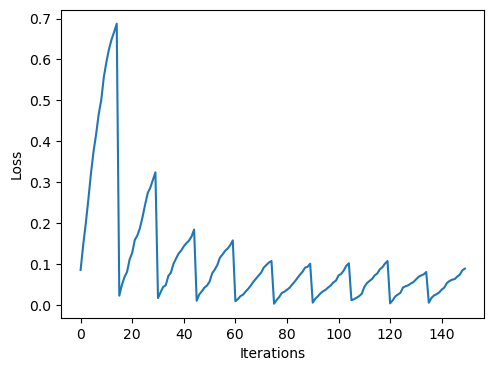

In [23]:
trainer.plot_loss_accuracy( losses, accuracies)